# Part 1: Data Management & Programming
### This project presents the visualisations about malaria starting with the data sets from Github repo: https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-11-13.

In [179]:
# Import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [180]:
# Set random seed
# random.seed(2024)

# Import dataset
path = "..."
malaria_deaths = pd.read_csv(path + "malaria_deaths.csv")
malaria_inc = pd.read_csv(path + "malaria_inc.csv")
malaria_deaths_age = pd.read_csv(path + "malaria_deaths_age.csv", index_col=0)

### Data Preparation

In [181]:
"""
Create a boxplot and histogram for specific columns for data preparation

Parameters:
- data: DataFrame
- col: The column to create the plots
- bins: Numbr of bins for the histogram

"""
def plot_box_and_hist(data, col, bins):
    # Create a figure with side by side plots
    fig, (ax_box, ax_hist) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Create histogram
    sns.histplot(data[col], bins=bins, ax=ax_hist)
    ax_hist.set_title(f'Histogram for Number of {col}')

    # Create boxplot
    sns.boxplot(data[col], ax=ax_box)
    ax_box.set_title(f'Boxplot for Number of {col}')

    # Display plots
    plt.tight_layout()
    plt.show()


##### Malaria Deaths

In [182]:
# Rename column 
malaria_deaths = malaria_deaths.rename(columns={"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)":"Deaths"})

# Remove duplicates
malaria_deaths.drop_duplicates()

# Summary
## Show information of the dataset
malaria_deaths.info()

## Show the statistics of the dataset
malaria_deaths['Deaths'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  6156 non-null   object 
 1   Code    5292 non-null   object 
 2   Year    6156 non-null   int64  
 3   Deaths  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB


count    6156.000000
mean       16.375074
std        38.606219
min         0.000000
25%         0.000000
50%         0.020219
75%         3.891035
max       229.228881
Name: Deaths, dtype: float64

c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


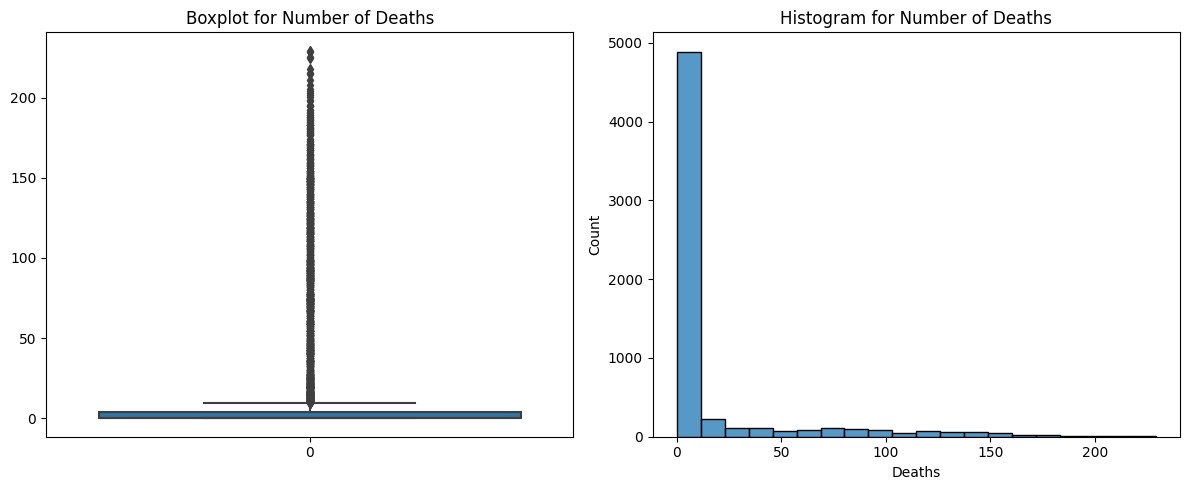

In [183]:
# View the distribution of Malaria deaths dataset
plot_box_and_hist(malaria_deaths, 'Deaths', 20)

##### Malaria Incidents

In [184]:
# Rename column 
malaria_inc = malaria_inc.rename(columns={"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)":"Incidences"})

# Remove duplicates
malaria_inc.drop_duplicates()

# Summary
## Show information of the dataset
malaria_inc.info()

## Show the statistics of the dataset
malaria_inc['Incidences'].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      508 non-null    object 
 1   Code        400 non-null    object 
 2   Year        508 non-null    int64  
 3   Incidences  508 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ KB


count     508.000000
mean      141.714565
std       176.637900
min         0.000000
25%         6.986310
50%        57.050000
75%       246.050000
max      1741.000000
Name: Incidences, dtype: float64

c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


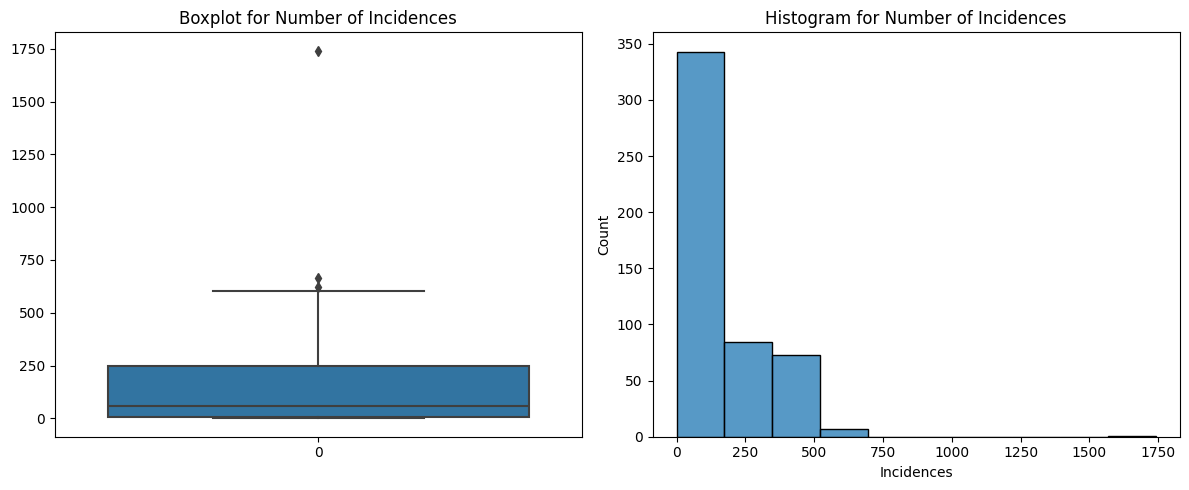

In [185]:
# View the distribution of the Malaria incidences dataset
plot_box_and_hist(malaria_inc, 'Incidences', bins=10)

In [186]:
# Replace outliers with median values

## Identify outliers
# Calulate IQR
Q1 = malaria_inc['Incidences'].quantile(0.25)
Q3 = malaria_inc['Incidences'].quantile(0.75)
IQR = Q3 - Q1

## Calculate upper bound
upper_bound = Q3 + 1.5 * IQR

## Extract outliers
outliers = malaria_inc[malaria_inc['Incidences'] > Q3 + 1.5 * IQR]

## Get the entities of the outliers
entity = outliers['Entity'].reset_index(drop=True)

## Get median values of these entities
stats = malaria_inc['Incidences'].groupby(malaria_inc['Entity']).describe().reset_index()
median_values = stats[stats['Entity'].isin(entity)]

# Replace outliers with median values
malaria_inc.loc[(malaria_inc['Entity'] == 'Burkina Faso') & (malaria_inc['Year'] == 2000), 'Incidences'] = median_values.loc[(median_values['Entity'] == 'Burkina Faso'),'50%'].values[0]
malaria_inc.loc[(malaria_inc['Entity'] == 'Ethiopia') & (malaria_inc['Year'] == 2000), 'Incidences'] = median_values.loc[(median_values['Entity'] == 'Ethiopia'),'50%'].values[0]
malaria_inc.loc[(malaria_inc['Entity'] == 'Turkey') & (malaria_inc['Year'] == 2000), 'Incidences'] = median_values.loc[(median_values['Entity'] == 'Turkey'),'50%'].values[0]

##### Malaria Deaths by Age groups

In [187]:
# Remove duplicates
malaria_deaths_age.drop_duplicates()

# Summary
## Show information of the dataset
malaria_deaths_age.info()

## Show the statistics of the dataset
malaria_deaths_age['deaths'].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 30780 entries, 1 to 30780
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entity     30780 non-null  object 
 1   code       26460 non-null  object 
 2   year       30780 non-null  int64  
 3   age_group  30780 non-null  object 
 4   deaths     30780 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


count     30780.000000
mean       3698.550438
std       33539.059413
min           0.000000
25%           0.000000
50%           0.123451
75%          80.505605
max      752025.548675
Name: deaths, dtype: float64

##### Extract data by regions for further data exploratory analysis

In [188]:
# Extract data by regions
filtered_malaria_deaths_age_regions = malaria_deaths_age[(malaria_deaths_age['code'].isna())].reset_index(drop=True)

# Remove entities with income and SDI group
filtered_malaria_deaths_age_regions = filtered_malaria_deaths_age_regions[~filtered_malaria_deaths_age_regions['entity'].str.contains('income|SDI', case=False, na=False)]

# Show the statistics of the filtered dataset
filtered_malaria_deaths_age_regions['deaths'].groupby(filtered_malaria_deaths_age_regions['entity']).describe()


,count,mean,std,min,25%,50%,75%,max
entity,,,,,,,,
Andean Latin America,135.0,13.159249,11.510801,1.892259,4.840876,9.115872,16.293804,43.893407
Australasia,135.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Caribbean,135.0,8.108944,8.135358,0.991776,2.269631,5.149513,8.943185,30.526738
Central Asia,135.0,2.764046,2.235299,0.175196,1.245047,2.108381,3.363435,8.526743
Central Europe,135.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Central Latin America,135.0,45.332631,34.671585,9.893030,19.707096,31.289987,62.066943,151.192852
Central Sub-Saharan Africa,135.0,22535.505508,34161.625055,1534.584536,3812.339179,6671.353843,10170.885291,109171.065293
East Asia,135.0,48.318032,54.593647,1.694156,7.168721,26.914286,52.874417,192.234068
Eastern Europe,135.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [189]:
# Group regions by continents 
# Create a function that assigns the region by continent
def assign_continent(region):
    """
    Categorise regions by continents

    Parameters:
    - region: represents each value in the entity

    """
    
    if 'Africa' in region:
        return 'Africa'
    elif 'Asia' in region:
        return 'Asia'
    elif 'America' in region:
        return 'America'
    elif 'Europe' in region:
        return 'Europe'
    else:
        return region

# Apply function and create a new column called 'continent'
filtered_malaria_deaths_age_regions['continent'] = filtered_malaria_deaths_age_regions['entity'].apply(assign_continent)

#  Select the continents
selected_cont = ['Africa', 'Asia', 'America', 'Europe', 'Oceania']

# Filter out data that contains the selected continents
malaria_deaths_age_continents = filtered_malaria_deaths_age_regions[filtered_malaria_deaths_age_regions['continent'].isin(selected_cont)].reset_index(drop=True)
malaria_deaths_age_continents


,entity,code,year,age_group,deaths,continent
0,Andean Latin America,NaN,1990,Under 5,43.893407,America
1,Andean Latin America,NaN,1991,Under 5,42.782675,America
2,Andean Latin America,NaN,1992,Under 5,41.262694,America
3,Andean Latin America,NaN,1993,Under 5,39.977449,America
4,Andean Latin America,NaN,1994,Under 5,35.983790,America
...,...,...,...,...,...,...
2695,Western Sub-Saharan Africa,NaN,2012,50-69,17510.921072,Africa
2696,Western Sub-Saharan Africa,NaN,2013,50-69,17021.054526,Africa
2697,Western Sub-Saharan Africa,NaN,2014,50-69,17246.249918,Africa
2698,Western Sub-Saharan Africa,NaN,2015,50-69,17623.970020,Africa


# Part 2: Exploratory Data Analysis
### In this part of the exploratory data analysis, I will only be analyzing the data of the entire world and by continent.

c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

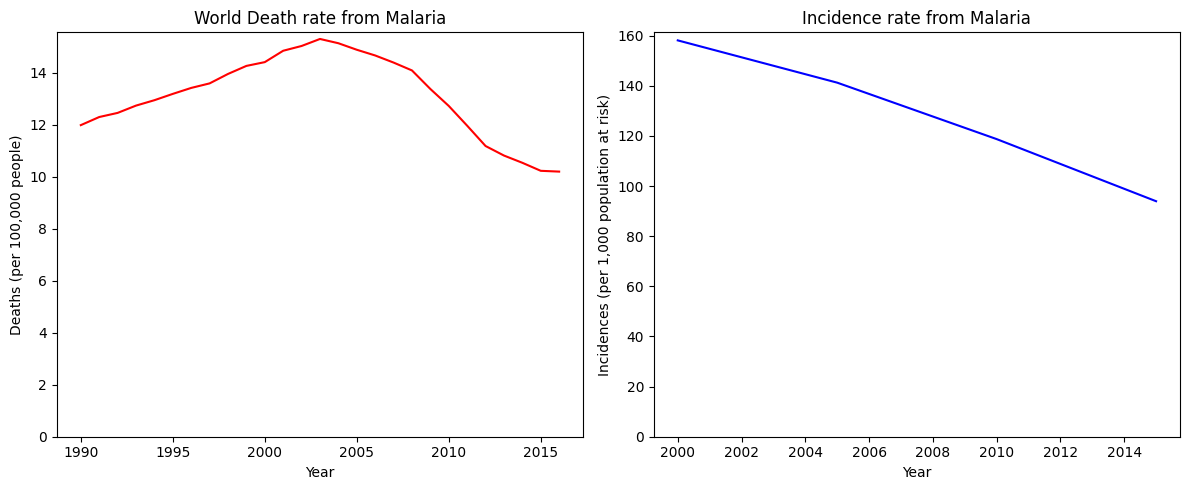

In [190]:
# Display line charts of the worldly death rate and incidence rate across the years
## Create a figure with side by side plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

## Create a line plot to show the worldly death rate
sns.lineplot(x='Year', y='Deaths', 
            data=malaria_deaths[malaria_deaths['Entity'] == 'World'], # Get 'World' data only from dataset
            ax=axs[0],
            color='red', # Set line plot to red
            errorbar=None, 
            markers=True)

## Set title
axs[0].set_title('World Death rate from Malaria')
## Set y axis label
axs[0].set_ylabel('Deaths (per 100,000 people)')
## Set the y axis limit starting at 0
axs[0].set_ylim(bottom=0)

## Create a line plot to show the worldly incidence rate
sns.lineplot(x='Year', y='Incidences', 
            data=malaria_inc[malaria_inc['Entity'] == 'World'], # Get 'World' data only from dataset
            ax=axs[1],
            color='blue', # Set line plot to blue
            errorbar=None, 
            markers=True)

## Set title
axs[1].set_title('Incidence rate from Malaria')
## Set y axis label
axs[1].set_ylabel('Incidences (per 1,000 population at risk)')
## Set the y axis limit starting at 0
axs[1].set_ylim(bottom=0)

## Display plots
plt.tight_layout()
plt.show()

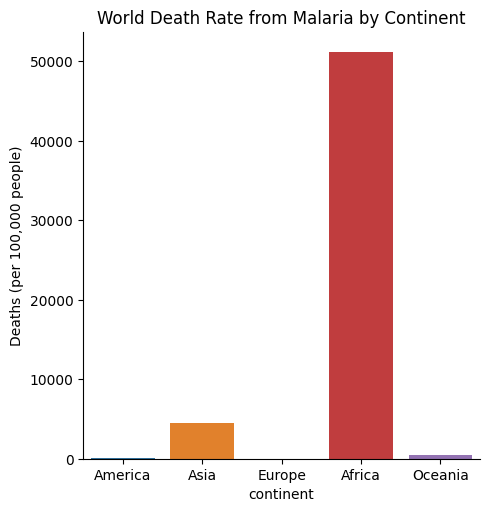

In [191]:
# Display line charts of the death rate by continents and age groups across the years 
# Create a plot
line_plot = sns.catplot(x='continent', y='deaths',
            data=malaria_deaths_age_continents,
            kind='bar',
            errorbar=None)
## Set title
plt.title('World Death Rate from Malaria by Continent')
## Set y axis label
plt.ylabel('Deaths (per 100,000 people)')
## Display plot
plt.show()

c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


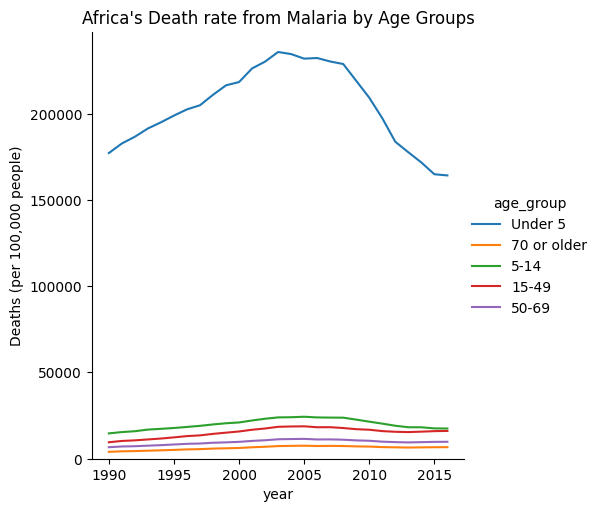

In [192]:
# Display line charts of the Africa's death rate across the years by age group
# Create a plot
death_age_plot = sns.relplot(x='year', y='deaths', data=malaria_deaths_age_continents[malaria_deaths_age_continents['continent'] == 'Africa'], 
            kind='line', 
            style='age_group', 
            hue='age_group',
            errorbar=None, 
            dashes=False)
## Set title
plt.title("Africa's Death rate from Malaria by Age Groups")
## Set y axis label
plt.ylabel('Deaths (per 100,000 people)')
## Set the y axis limit starting at 0
death_age_plot.ax.set_ylim(bottom=0)
## Display plot
plt.show()